In [28]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

# 1. 데이터

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
      dtype=int64))
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
(60000, 784) (60000,)
(10000, 784) (10000,)


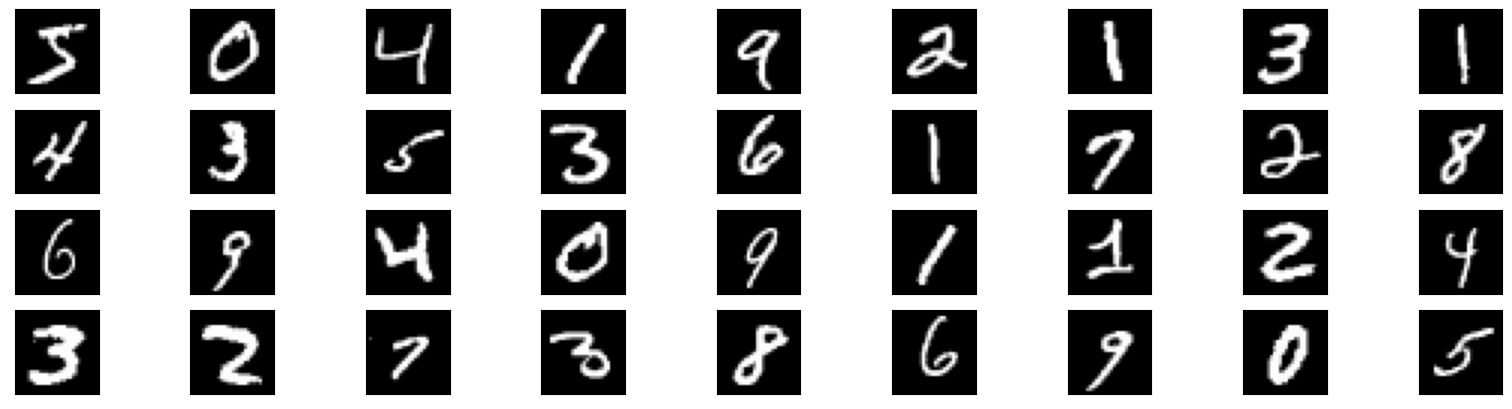

In [29]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(np.unique(y_train, return_counts = True)) 

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)   

figure = plt.figure(figsize=(20,5))
for i in range(36):
    img = figure.add_subplot(4, 9, i+1, xticks=[], yticks=[])
    img.imshow(x_train[i], 'gray')       

# ---------- 전처리 (2차원으로 변환) ---------- #
x_train = x_train.reshape(60000, 28*28)
x_test = x_test.reshape(10000, 28*28)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)  

x_test = x_test/255.0
x_train = x_train/255.0

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 2. 모델


In [30]:
model = Sequential()
model.add(Dense(units=64, input_shape=(28*28, ), activation='relu')) 
model.add(Dense(units=64, activation='relu')) 
model.add(Dropout(0.3)) 
model.add(Dense(units=32, activation='relu')) 
model.add(Dropout(0.3)) 
model.add(Dense(units=16, activation='relu')) 
model.add(Dense(units=10, activation='softmax')) 
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 64)                50240     
                                                                 
 dense_26 (Dense)            (None, 64)                4160      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_27 (Dense)            (None, 32)                2080      
                                                                 
 dropout_6 (Dropout)         (None, 32)                0         
                                                                 
 dense_28 (Dense)            (None, 16)                528       
                                                                 
 dense_29 (Dense)            (None, 10)               

# 3. 컴파일 및 훈련

In [31]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='acc') # one-hot encoding 하지 않아도 되는 데이터이므로 loss= sparse_categorical_crossentropy

path = 'C:/study/keras/keras_save/MCP/'
MCP = ModelCheckpoint(monitor='acc', mode='auto', save_best_only=True, filepath=path+'keras36_1_mnist.hdf5') 
ES = EarlyStopping(monitor='acc', mode='auto', patience=4, restore_best_weights=True) 
model.fit(x_train, y_train, epochs=32, batch_size=512, validation_split=0.1, callbacks=[ES, MCP])

Epoch 1/32
106/106 [==============================] - 1s 8ms/step - loss: 1.3770 - acc: 0.5230 - val_loss: 0.4071 - val_acc: 0.9032
Epoch 2/32
106/106 [==============================] - 1s 6ms/step - loss: 0.5658 - acc: 0.8379 - val_loss: 0.2251 - val_acc: 0.9402
Epoch 3/32
106/106 [==============================] - 1s 5ms/step - loss: 0.3793 - acc: 0.8974 - val_loss: 0.1611 - val_acc: 0.9575
Epoch 4/32
106/106 [==============================] - 1s 5ms/step - loss: 0.3055 - acc: 0.9177 - val_loss: 0.1358 - val_acc: 0.9625
Epoch 5/32
106/106 [==============================] - 1s 5ms/step - loss: 0.2513 - acc: 0.9330 - val_loss: 0.1246 - val_acc: 0.9653
Epoch 6/32
106/106 [==============================] - 1s 6ms/step - loss: 0.2166 - acc: 0.9425 - val_loss: 0.1217 - val_acc: 0.9680
Epoch 7/32
106/106 [==============================] - 1s 5ms/step - loss: 0.1951 - acc: 0.9487 - val_loss: 0.1167 - val_acc: 0.9697
Epoch 8/32
106/106 [==============================] - 1s 5ms/step - loss: 0.

# 4. 평가 및 예측

In [33]:
metric = model.evaluate(x_test, y_test) # compile에서 metrics = acc를 지정했으므로 evaluate는 값을 배열 형태로 2개 반환함
print('loss: ', metric[0], 'acc: ', metric[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.1334 - acc: 0.9726
loss:  0.13337604701519012 acc:  0.972599983215332
